<a href="https://colab.research.google.com/github/atharvakarnik/DataScience/blob/master/CV_MotionBlur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2 as cv

In [23]:
img = cv.imread('Esther.jpg')
imgRsz = cv.resize(img, (int(img.shape[1]/5), int(img.shape[0]/5)))
print(img.shape)
print(imgRsz.shape)

(1536, 2048, 3)
(307, 409, 3)


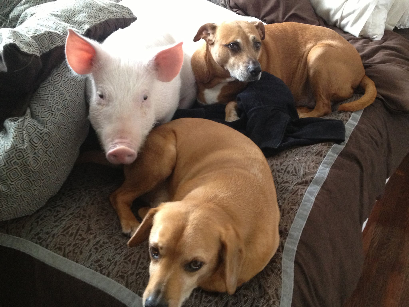

In [24]:
#cv.imshow("Esther & Co.", img)
#cv.waitKey(0)
#cv.destroyAllWindows()
#Since the cv2.imshow is disabled in Colab, importing specialized library
from google.colab.patches import cv2_imshow
cv2_imshow(imgRsz)

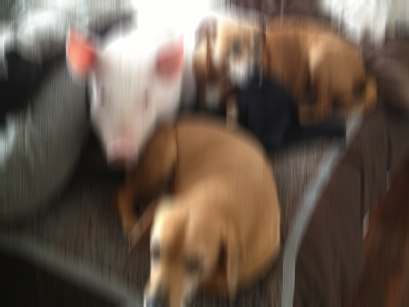

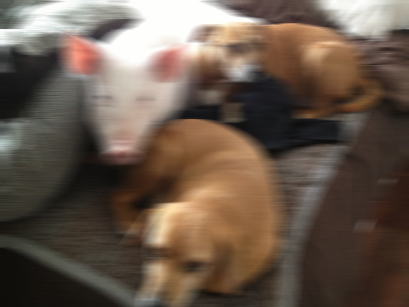

In [27]:
kernel_size = 20
kernel_v = np.zeros((kernel_size, kernel_size)) 
kernel_h = np.copy(kernel_v) 

kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size) 
kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size)

kernel_v /= kernel_size 
kernel_h /= kernel_size 

vertical_mb = cv.filter2D(imgRsz, -1, kernel_v)
horizonal_mb = cv.filter2D(imgRsz, -1, kernel_h) 

cv2_imshow(vertical_mb)
cv2_imshow(horizonal_mb)

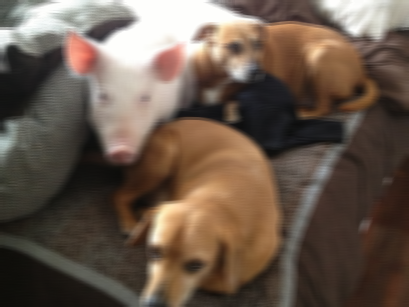

In [39]:
raw_kern = np.array([[0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0]])
raw_mb = cv.filter2D(imgRsz, -1, raw_kern) 
cv2_imshow(raw_mb)